In [ ]:
#정확도 문제로 이 커스텀 모델은 사용하지 않습니다.
# 대신 ResNet-50을 이용합니다.

In [1]:
import os
# import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img, save_img
# from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
# from tensorflow.keras import datasets, layers, models, activations  
import json
import seaborn as sns

%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
#폴더내 파일 리스트
file_list = os.listdir('/home/team3/hdd/Training_resized/고추')
len(file_list)
# file_list[10100]

29343

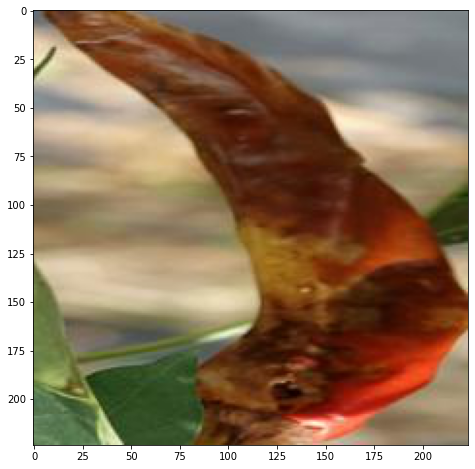

In [4]:
#이미지 데이터 확인
plt.figure(figsize=(8,8))
img = load_img('/home/team3/hdd/Training_resized/고추/V006_79_1_01_01_01_13_3_0149z_20201007_5_a0008.JPG')
plt.imshow(img)



In [5]:
#라벨링 데이터 확인
ims = pd.read_json('/home/team3/hdd/Training_resized/[라벨]고추/V006_79_1_01_01_01_13_3_0149z_20201007_5_a0008.JPG.json')
ims
# infos = ims['description']['width']
# infos

,description,annotations,augmented
image,V006_79_1_01_01_01_13_3_0149z_20201007_5_a0008...,NaN,NaN
date,2020/10/07,NaN,NaN
worker,,NaN,NaN
height,3648,NaN,NaN
width,5472,NaN,NaN
task,79,NaN,NaN
type,1,NaN,NaN
region,8,NaN,NaN
original,V006_79_1_01_01_01_13_3_0149z_20201007_5.JPG,NaN,NaN
disease,NaN,1,NaN


In [6]:
#라벨링 폴더 내 파일 이름 목록 할당
file_list_meta=os.listdir('/home/team3/hdd/Training_resized/[라벨]고추')

len(file_list_meta)

29343

In [7]:
#이미지 폴더 내 파일 이름 목록 할당
file_list_img=os.listdir('/home/team3/hdd/Training_resized/고추')
len(file_list_img)

29343

In [8]:
#메타 데이터 할당
img_info = []
for i in tqdm(range(len(file_list_img))):  #고추 
    img_inf = pd.read_json('/home/team3/hdd/Training_resized/[라벨]고추/' + file_list_img[i]+'.json')
    img_info.append(img_inf)

100%|██████████| 29343/29343 [02:13<00:00, 219.26it/s]


In [9]:
len(img_info)

29343

In [10]:
#학습용 disease 정리
disease_array = []
for i in tqdm(range(len(file_list_img))):
    disease_array.append(img_info[i]["annotations"]['disease'])
disease_array = np.array(disease_array)

100%|██████████| 29343/29343 [00:00<00:00, 63295.00it/s]


In [11]:
#disease 확인
disease_array

array([0, 0, 0, ..., 2, 2, 2])

In [12]:
#이미지 데이터 할당
imgs = []
for i in tqdm(range(len(file_list_img))):  #고추 
    img_ = load_img('/home/team3/hdd/Training_resized/고추/' + file_list_img[i])
    img_ = np.array(img_)
    imgs.append(img_)

100%|██████████| 29343/29343 [01:20<00:00, 363.61it/s]


In [13]:
x_train, x_val, y_train, y_val = train_test_split(np.array(imgs), np.array(disease_array), test_size=0.2)

In [14]:
len(x_val)

5869

In [15]:
image_height=224
image_width=224
image_channel=3

In [16]:
model = Sequential([    
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(image_height, image_width, image_channel)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.25),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [1]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

NameError: name 'model' is not defined

In [18]:

EPOCHS = 15

# EPOCHS에 따른 성능을 보기 위하여 history 사용
history = model.fit(x_train, 
                    y_train,
                    validation_data = (x_val, y_val), # validation 데이터 사용
                    epochs=EPOCHS, 
                   )

Epoch 1/15
734/734 [==============================] - 46s 50ms/step - loss: 132.4855 - accuracy: 0.5800 - val_loss: 1.3410 - val_accuracy: 0.3486
Epoch 2/15
734/734 [==============================] - 36s 48ms/step - loss: 0.7372 - accuracy: 0.6332 - val_loss: 1.6507 - val_accuracy: 0.3679
Epoch 3/15
734/734 [==============================] - 36s 48ms/step - loss: 0.6436 - accuracy: 0.7010 - val_loss: 1.7107 - val_accuracy: 0.3759
Epoch 4/15
734/734 [==============================] - 36s 48ms/step - loss: 0.6013 - accuracy: 0.7288 - val_loss: 1.6159 - val_accuracy: 0.4510
Epoch 5/15
734/734 [==============================] - 36s 49ms/step - loss: 0.5519 - accuracy: 0.7582 - val_loss: 1.3764 - val_accuracy: 0.5268
Epoch 6/15
734/734 [==============================] - 36s 49ms/step - loss: 0.5063 - accuracy: 0.7822 - val_loss: 1.3778 - val_accuracy: 0.5032
Epoch 7/15
734/734 [==============================] - 36s 49ms/step - loss: 0.4620 - accuracy: 0.8071 - val_loss: 1.4237 - val_accurac

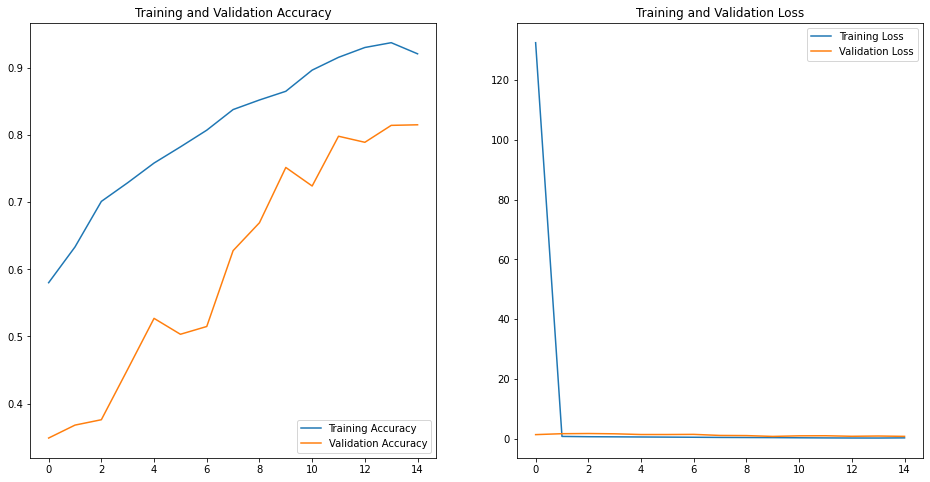

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()